In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
f = pd.read_csv(f"{CWD}/data/summary/properties.csv")
mj = pd.read_csv(f"{CWD}/data/summary/mamajek_teff_spt.csv")
f["teff"] = f.apply(lambda x: mj[mj.SpT==x["st"]].iloc[0].Teff,axis=1)
f

,idtyp,id,st,desig_2mass,dist,dist_err,dist_source,rad,rad_err,tflux,...,tlum,tlumerr,kflux,kfluxerr,klum,klumerr,gmag,jmag,kmag,teff
0,kep,100004076,L1,19064801+4011089,16.7867,0.038400,gaia,0.108176,0.003151,3.319760e-12,...,1.119535e+29,6.553810e+27,6.712990e-13,4.272880e-14,2.263849e+28,1.444680e+27,17.8356,13.078,11.771,2100
1,tess,237880881,M5,01180670-6258591,46.0681,0.143774,gaia,0.275151,0.008039,3.492650e-11,...,8.870689e+30,5.645140e+29,1.272670e-11,6.844750e-13,3.232358e+30,1.750110e+29,14.9796,11.530,10.636,3030
2,tess,44984200,M6,08380224-5855583,11.1067,0.027472,gaia,0.142339,0.004147,6.305290e-11,...,9.308451e+29,6.480260e+28,2.018160e-11,1.412120e-12,2.979395e+29,2.089910e+28,14.4115,10.309,9.268,2850
3,tess,277539431,M7,10551532-7356091,13.7047,0.106872,gaia,0.145216,0.004370,5.011190e-11,...,1.126370e+30,1.051740e+29,1.380730e-11,1.517240e-12,3.103479e+29,3.444490e+28,14.7381,10.630,9.666,2650
4,tess,300741820,M6,07404497-6648318,22.2665,4.409260,mk_dupuy2012,0.127594,0.025538,2.711650e-11,...,1.608939e+30,6.469320e+29,8.679300e-12,6.072970e-13,5.149798e+29,2.071140e+29,15.3277,11.959,11.126,2850
5,tess,230120143,M7,16402068+6736046,14.4346,0.055862,gaia,0.198365,0.005817,1.489030e-10,...,3.712907e+30,3.430260e+29,4.102720e-11,4.508350e-12,1.023014e+30,1.126940e+29,13.5557,9.854,8.950,2650


In [7]:
df = pd.read_csv(f"{CWD}/analysis/results/mcmc/mcmcoutput.csv").iloc[4:]
p = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
df = df.merge(p[["ID","Prot_d"]], on="ID")
df = df.merge(f[["id","teff"]], right_on="id", left_on="ID")
df

,date,suffix,ID,burnin,steps,walkers,nparam,t0_p16,t0_p50,t0_p84,...,radius_p84,ED_distr_p16,ED_distr_p50,ED_distr_p84,Eflare_p16,Eflare_p50,Eflare_p84,Prot_d,id,teff
0,13_12_2019_10_18,NaN,100004076,30000,93609,32,6,1358.512267,1358.512559,1358.512803,...,20.788303,40875.316896,43296.050052,48037.063099,4.576136e+33,4.847145e+33,5.377918e+33,0.37015,100004076,2100
1,10_02_2020_09_42,NaN,100004076,10000,78344,32,6,1358.510680,1358.510936,1358.511178,...,20.852499,8152.296366,36472.086191,43587.038246,9.126783e+32,4.083178e+33,4.879722e+33,0.37015,100004076,2100
2,11_02_2020_11_16,a,237880881,50000,92499,32,10,1331.664025,1331.664060,1331.664083,...,63.810890,6472.685255,9273.370537,13543.305415,5.741718e+34,8.226119e+34,1.201385e+35,0.35125,237880881,3030
3,11_02_2020_11_16,b,237880881,50000,92499,32,10,1331.824372,1331.824625,1331.826351,...,20.357498,4249.428882,5493.592667,6001.039380,3.769536e+34,4.873195e+34,5.323336e+34,0.35125,237880881,3030
4,11_02_2020_10_07,a,237880881,10000,122111,32,9,1331.663853,1331.663871,1331.663888,...,42.367065,4941.263308,4989.057826,5038.918314,4.383241e+34,4.425638e+34,4.469868e+34,0.35125,237880881,3030
5,11_02_2020_10_07,b,237880881,10000,122111,32,9,1331.826394,1331.826538,1331.826684,...,16.914437,4690.292806,4725.907976,4785.631270,4.160613e+34,4.192206e+34,4.245185e+34,0.35125,237880881,3030


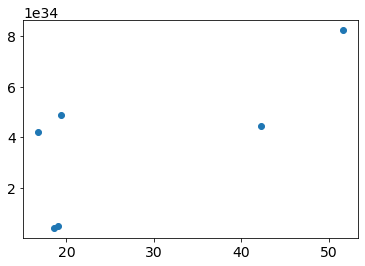

In [11]:
plt.scatter(df.radius_p50,df.Eflare_p50)
#plt.yscale("log")
#plt.xscale("log")

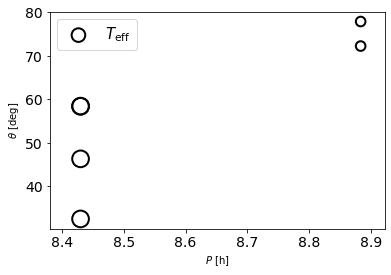

In [10]:
plt.scatter(df.Prot_d*24,df.theta_a_p50, s=df.teff**3/1e8,
            facecolors='none', edgecolors='k', linewidth=2,
            label=r"$T_\mathrm{eff}$")
plt.ylabel(r"$\theta$ [deg]")
plt.xlabel(r"$P$ [h]")
plt.legend(fontsize=15);